## Unsupervised Learning Example: KMeans

This example uses KMeans Algorithm in sklearn library to cluster a set of samples

In [1]:
#make sure sklearn is installed
!conda install scikit-learn

Solving environment: done

# All requested packages already installed.



In [11]:
#load required functions and libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#prepare the data
data=pd.read_csv("students.csv")#load csv data file
data=data.drop(['Timestamp','github','Mathematics'],axis=1)#remove unnecessary features
Names=np.array(data[['Name']].values)
data=data.set_index('Name')
print(data.shape)
print(data.head())

#convert physical computing text to numbers
leComputing=LabelEncoder()
leComputing.fit(data[['computing']].values)
data[['computing']]=leComputing.transform(data[['computing']].values)


#data=data.drop(['Name'],axis=1)#remove name feature

#convert data to samples
X=np.array(data.values)
#apply KMeans to K clusters
ClustersCount=4
kmeans = KMeans(n_clusters=ClustersCount, random_state=0)
kmeans.fit(X)#fit the samples, and find the clusters

lst=zip(Names,kmeans.labels_)
print("Associated Clusters")
for a,b in lst:
    print("{0} --> {1}".format(a[0],b))

(12, 4)
                  Programming  Python  Unity3D               computing
Name                                                                  
Daisuke Yamamoto            5       4         5  Arduino, Raspberry Pi
Taka                        7       7         1         Arduino, ESP32
Hiroo Yamamura              1       1         1                Arduino
Ada(Luchi REN)              2       2         1                Arduino
Rahul Mehta                 4       3         1                Arduino
Associated Clusters
Daisuke Yamamoto --> 1
Taka --> 3
Hiroo Yamamura --> 2
Ada(Luchi REN) --> 2
Rahul Mehta --> 0
Lan Qingyun --> 2
Mark Armstrong --> 1
Lawrence Quest --> 0
HUANG WEIHAN (Yui) --> 2
Daisuke Takeuchi --> 0
 Chu Yen Ly --> 2
Bao Jie --> 2


/Users/yamensaraiji/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yamensaraiji/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
def plotPoints(x,y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(A,B,c=kmeans.labels_)
    for i,v in enumerate(Names):
        plt.annotate(str(i),(A[i],B[i]))
    plt.scatter(centers_x,centers_y,marker='+')
    plt.show()

[['Daisuke Yamamoto']
 ['Taka']
 ['Hiroo Yamamura']
 ['Ada(Luchi REN)']
 ['Rahul Mehta']
 ['Lan Qingyun']
 ['Mark Armstrong']
 ['Lawrence Quest']
 ['HUANG WEIHAN (Yui)']
 ['Daisuke Takeuchi']]


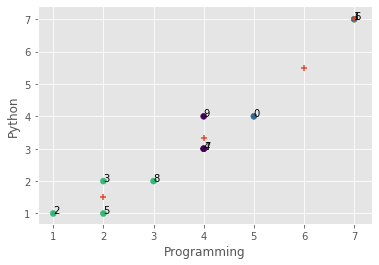

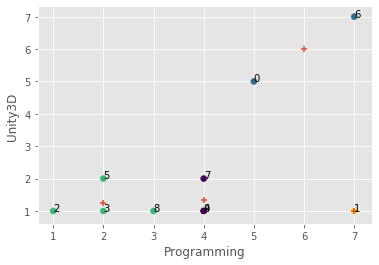

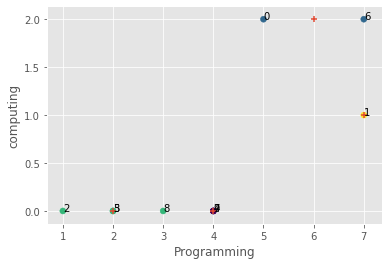

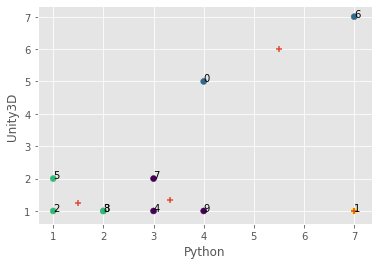

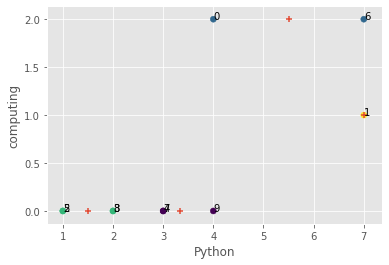

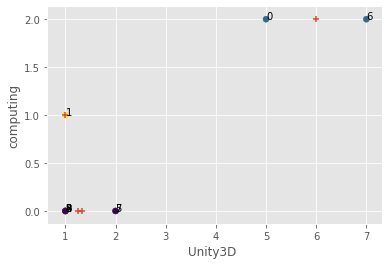

In [10]:
idx0=0
idx1=2

print(Names)

for idx0 in range(0,len(kmeans.cluster_centers_[0])-1):
    for idx1 in range(idx0+1,len(kmeans.cluster_centers_[0])):
        A=X[:,idx0]
        B=X[:,idx1]
        centers_x=kmeans.cluster_centers_[:,idx0]
        centers_y=kmeans.cluster_centers_[:,idx1]
        plotPoints(data.columns.values[idx0],data.columns.values[idx1])